In [1]:
import torch

import torchvision

import matplotlib.pyplot as plt

from torch.utils.data.dataloader import DataLoader

import torchvision.transforms as transforms

import torchvision.datasets as datasets

from torch.optim import Adam

import torch.nn as nn

import torch.nn.functional as F

from tqdm import tqdm

In [2]:
transform = transforms.ToTensor()


train_set = datasets.MNIST(root='/data' , train=True , download=True , transform = transform)

test_set = datasets.MNIST(root='/data' , train=False,  download=True , transform=transform)

## Now see the data , do some visualizing

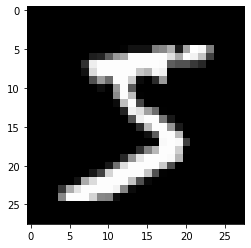

In [3]:
#plot the number 


plt.imshow(train_set.data[0].numpy() , cmap='gray')



In [9]:
#load the data

batch_size=120

train_loader = DataLoader(train_set , batch_size=batch_size , shuffle=True)
test_loader = DataLoader(test_set , batch_size=batch_size)

In [10]:
#see the first batch data of size 64
for xb , yb in train_loader:
    print(xb)
    print(yb)
    break

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

## Build our neural Network

In [13]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
#             nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
#             nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        print(out.shape)
        out = x.view(-1,7*7*32)
        out = self.fc(out)
        return out
    

model = ConvNet()

#optimizer 

optimizer = Adam(model.parameters(), lr=0.001)

#loss function

criterion = nn.CrossEntropyLoss()

In [14]:
#now lets train the model

epochs = 3

for epoch in range(epochs):
    for data in tqdm(train_loader): #loop over batches
        X, y =data
        
        output = model(X)
        
        #calculate loss
        loss = criterion(output , y)
        
        #now do the backprop
        
        optimizer.zero_grad()
        
        loss.backward()
        
        #update the kernal
        optimizer.step()
        
    print(f'EPoch : {epoch} , loss : {loss}') 

  0%|                                                                                          | 0/500 [00:00<?, ?it/s]

torch.Size([120, 32, 7, 7])


  0%|                                                                                          | 0/500 [00:00<?, ?it/s]


ValueError: Expected input batch_size (60) to match target batch_size (120).